<a href="https://colab.research.google.com/github/Sreekanth2097/Home-work/blob/main/Copy_of_week14_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#load the data
data_file_path = "/content/COVID-19_Outcomes_by_Vaccination_Status_-_Historical.csv"
data = pd.read_csv(data_file_path)

#display the data
data

,Outcome,Week End,Age Group,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,...,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
0,Deaths,10/01/2022,All,0.3,0.1,0.9,3.0,0.3,0.4,0.3,...,1.3,0.7,591822,842535.0,1037067.0,2,1.0,9.0,999,999
1,Deaths,07/09/2022,0-4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,0,NaN,NaN,0,4
2,Cases,11/12/2022,0-4,82.4,5.5,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,134,9.0,NaN,0,4
3,Hospitalizations,08/13/2022,0-4,7.4,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,12,0.0,NaN,0,4
4,Cases,02/26/2022,0-4,54.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,88,NaN,NaN,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,Deaths,11/13/2021,65-79,8.7,5.5,1.8,1.6,4.8,NaN,NaN,...,NaN,NaN,57295,146087.0,56482.0,5,8.0,1.0,65,79
3749,Cases,09/30/2023,18-29,51.0,17.7,19.8,2.9,2.6,NaN,NaN,...,NaN,NaN,72503,214130.0,161728.0,37,38.0,32.0,18,29
3750,Deaths,10/09/2021,80+,16.4,3.8,NaN,4.3,NaN,NaN,NaN,...,NaN,NaN,30481,52266.0,NaN,5,2.0,NaN,80,200
3751,Deaths,09/25/2021,80+,19.4,1.9,NaN,10.2,NaN,NaN,NaN,...,NaN,NaN,30936,52848.0,NaN,6,1.0,NaN,80,200


In [ ]:
# Basic Statistics
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 3753
Number of columns: 21


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [ ]:
# Data Diversity
unique_values = data.nunique()
most_diverse_column = unique_values.idxmax()
second_most_diverse_column = unique_values.drop(most_diverse_column).idxmax()

print("Number of unique values per column:")
print(unique_values)
print(f"Column with the most diversity: {most_diverse_column} ({unique_values[most_diverse_column]} unique values)")
print(f"Column with the second most diversity: {second_most_diverse_column} ({unique_values[second_most_diverse_column]} unique values)")


Number of unique values per column:
Outcome                              3
Week End                           140
Age Group                            9
Unvaccinated Rate                 1287
Vaccinated Rate                    915
Boosted Rate                       834
Crude Vaccinated Ratio             241
Crude Boosted Ratio                163
Age-Adjusted Unvaccinated Rate     272
Age-Adjusted Vaccinated Rate       207
Age-Adjusted Boosted Rate          176
Age-Adjusted Vaccinated Ratio      109
Age-Adjusted Boosted Ratio          86
Population Unvaccinated           1088
Population Vaccinated              963
Population Boosted                 785
Outcome Unvaccinated               513
Outcome Vaccinated                 408
Outcome Boosted                    430
Age Group Min                        9
Age Group Max                        9
dtype: int64
Column with the most diversity: Unvaccinated Rate (1287 unique values)
Column with the second most diversity: Population Unvaccinate

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [ ]:
# Data Rebundancy
redundant_columns = [col for col in data.columns if data[col].nunique() == 1]
if redundant_columns:
    print(f"Columns with the same value for every row: {redundant_columns}")
else:
    print("No columns have the same value for every row.")


No columns have the same value for every row.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

Generating histogram for column: Unvaccinated Rate


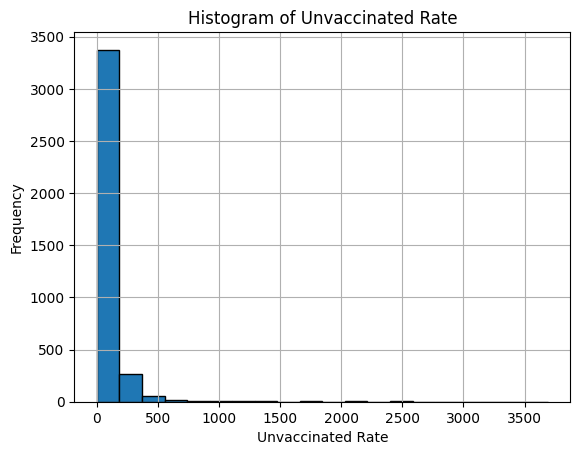

In [ ]:
# Range of Values
numeric_columns = data.select_dtypes(include=['number'])
if not numeric_columns.empty:
    column_to_plot = numeric_columns.columns[0]  # Pick the first numeric column
    print(f"Generating histogram for column: {column_to_plot}")
    numeric_columns[column_to_plot].hist(bins=20, edgecolor='black')
    plt.title(f"Histogram of {column_to_plot}")
    plt.xlabel(column_to_plot)
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No numeric columns found in the dataset.")


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

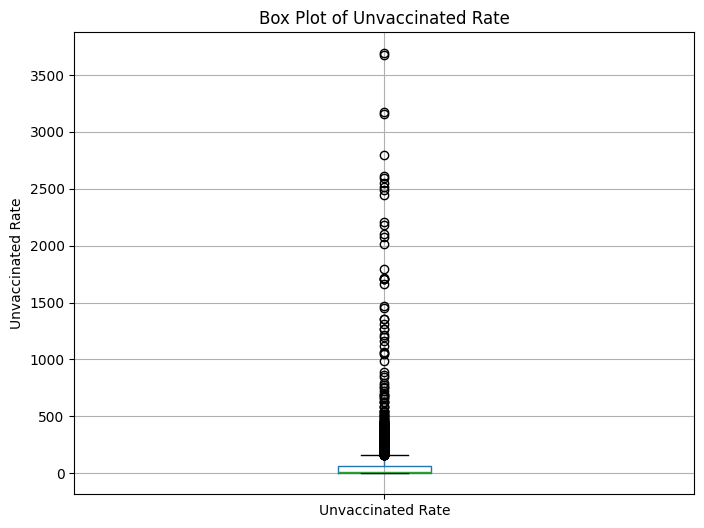

In [ ]:
if not numeric_columns.empty:
    column_to_plot = numeric_columns.columns[0]
    plt.figure(figsize=(8, 6))
    numeric_columns.boxplot(column=column_to_plot)
    plt.title(f"Box Plot of {column_to_plot}")
    plt.ylabel(column_to_plot)
    plt.show()





---



## Submitting Your Work

Submit your work as usual.